Notebook initialization:

You need to run the next 3 cells!

In [2]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [3]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Common settings for cosmological parameters and other CLASS parameters

In [4]:
common_settings = {
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T10',
                   'integrate_wrt_m200m' : 1
}


p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}
factor_sz = 1e-2

# testing cellls

# Computing cluster abundance

matches high-accuracy cosmomc at 0.2% level

In [11]:
M = Class()


best_fit_planck_new_sigmaM ={
    'H0':  68.576660156250000 ,
    'sigma8': 0.75290221947553726 ,
   'omega_cdm': 1.2547102E-01,
   'omega_b': 2.1865653E-02,
   'tau_reio': 0.09,
   'n_s': 9.5611087E-01,
    
    'alpha_ym': 1.8674885E+00,
    'ystar_ym': -1.8663318E-01,
    'sigmaM_ym': 1.6903344E-01,
    'B': 1./(7.7068241E-01)
}

best_fit_planck_old_sigmaM ={
   'H0': 67.834472656250000,
    'sigma8':0.76886885293327345,
   'omega_cdm': 1.1707694E-01,
   'omega_b': 2.1572441E-02,
   'tau_reio': 0.09,
   'n_s': 9.6892923E-01,
    
    'alpha_ym': 1.8226235E+00,
    'ystar_ym': -1.9139607E-01,
    'sigmaM_ym': 7.0815376E-02,
    'B': 1./(7.6169989E-01)
}


cosmomc_default = {
    
'h':0.67702636718750000,
'omega_b': 2.2100000000000002e-2,
'omega_cdm':0.12000000000000000,
'n_s':0.95999999999999996,
'A_s': 22.197951281441636e-10,
'tau_reio':0.0543,

'B': 1.25,
'sigmaM_ym': 0.075,
'ystar_ym': -0.186,
'alpha_ym': 1.7889999999999999
}
M.set(best_fit_planck_old_sigmaM)

M.set({
          'output' : 'sz_cluster_counts',
          'mass function' : 'M500',
          'integrate_wrt_m500c' : 1,
          'has_selection_function' : 1,
          'experiment' : 0,
          'y_m_relation' : 0,
          'signal-to-noise cut-off for survey cluster completeness' : 6.,
          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.0,
          'T_ncdm': 0.71611,
          'input_verbose' : 0,
          'background_verbose': 3,
          'perturbations_verbose': 0,
          'sz_verbose'  : 3,

          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 1.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.25,

          'dlny' : 0.02,
          'lnymin' : -11.5,
          'lnymax' : 10.,
          'dlnM_cluster_count_completeness_grid' : 0.02,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.2,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

          'dz_cluster_count_completeness_grid_low_z' : 1e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,

          'mass_epsrel_cluster_counts' : 1e-4,
          'mass_epsabs_cluster_counts' : 1e-40,

          'redshift_epsrel_cluster_counts' : 1e-4,
          'redshift_epsabs_cluster_counts' : 1e-40,

#           # # tabulation of mass function:
          'n_z_dndlnM' : 200,
          'n_m_dndlnM' : 200,
#           #
#           # # computation of mass function
#           # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 200,
          'ndim_redshifts' : 200,

#           # pk setup for computation of sigma and dsigma
    
          'k_per_decade_class_sz' : 40., #important parameter
          'k_min_for_pk_class_sz' : 1e-4,
          'k_max_for_pk_class_sz' : 2e0,

          'P_k_max_h/Mpc' : 2e1
    
})
M.compute()
print(M.sigma8())
print(M.get_sigma8_at_z(0.0002))
print(M.get_sigma8_at_z(0.0))

0.7688688506841118
0.7691138428718365
0.7691932926725019


In [9]:
M.get_current_derived_parameters(['h'])

{'h': 0.6857666015625}

In [13]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']
M.struct_cleanup()
M.empty()



In [14]:
np.sum(dNdzdy_theoretical)

393.27764970896203

In [15]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))




No handles with labels found to put in legend.


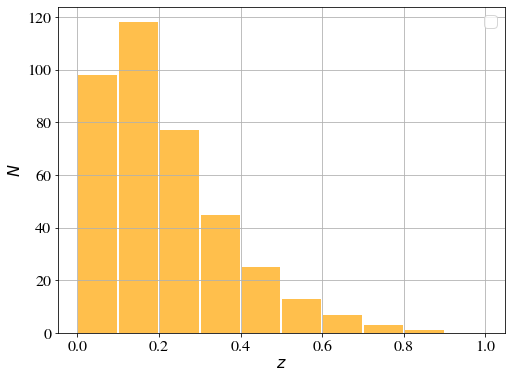

In [16]:
#N_clusters_z, xedges = np.histogram(z, bins=z_edges)
# plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.hist(z_center,N_clusters_z_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95)
plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
# plt.ylim(1e0,5e3)

No handles with labels found to put in legend.


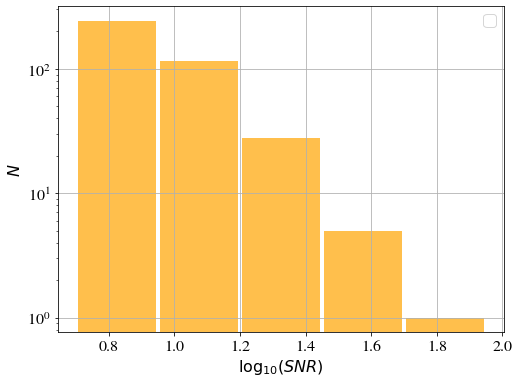

In [17]:
#N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
# plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.plot(log10y_center,N_clusters_y_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95)


plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')

# connection between pressure profiles and y-m relations

In [71]:
M = Class()
cosmo_settings = {
                  'omega_cdm': 0.125,
                  'omega_b': 0.0224,
                  'A_s': 1.9e-9,
                  'n_s': 0.96,
                  'H0': 70.,
                  'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
                  'YHe': 'BBN',

                  # 1 massive neutrino (planck 2018 baseline)
                  'N_ur': 2.0328,
                  'N_ncdm': 1,
                  'm_ncdm': 0.06,
                  'T_ncdm': 0.71611,
                   
                  'M2SZ': 5e16,


                  # X ray mass bias (if applicable)
                  'B' : 1.,
                  'output' : 'sz_cluster_counts,m200c_to_m500c,m500c_to_m200c',
                  'pressure profile': 'Custom. GNFW',
                  'P0GNFW': 8.403,
                  'c500':1.177,
                  'gammaGNFW':0.3081,
                  'alphaGNFW':1.0510,
                  'betaGNFW':5.4905
}

M.set(cosmo_settings)
M.compute()

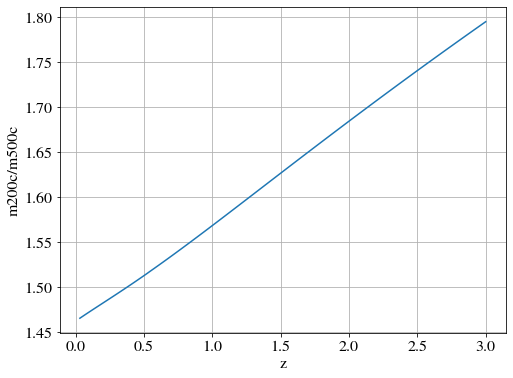

In [74]:

z=1.e-5
m500c_pivot = 3e14*0.7 # [Msun/h]


# corresponding m200c_pivot as a function of z:

z_array = np.linspace(0,3.,100)
m200c_over_m500c_pivot = []
m200m_over_m500c_pivot = []
for zz in z_array:
    m200c_over_m500c_pivot.append(M.get_m500c_to_m200c_at_z_and_M(zz,m500c_pivot)/m500c_pivot)
#     m200m_over_m500c_pivot.append(M.get_m500c_to_m200m_at_z_and_M(zz,m500c_pivot)/m500c_pivot)

    
plt.plot(z_array,m200c_over_m500c_pivot)
plt.xlabel('z')
plt.ylabel('m200c/m500c')
plt.grid(which='both')

[]

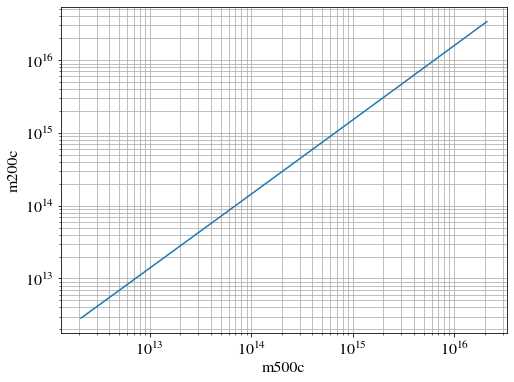

In [69]:
m500c_array = np.geomspace(1e-2,1e2,100)*m500c_pivot
m200c_array = []
for mm in m500c_array:
    m200c_array.append(M.get_m500c_to_m200c_at_z_and_M(z,mm))

plt.plot(m500c_array,m200c_array)
plt.xlabel('m500c')
plt.ylabel('m200c')
plt.grid(which='both')
plt.loglog()

In [70]:
# range of integration of the reduced pressure profile:
x= np.logspace(-8,2,1000)


def E(zp):
    return M.Hubble(zp)/M.Hubble(0.)

vec_get_dy_classy_gnfw = np.vectorize(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c)
vec_get_dy_classy_battaglia = np.vectorize(M.get_1e6xdy_from_battaglia_pressure_at_x_z_and_m200c)

def y0_over_Ez2_over_mfid_gnfw_at_m_and_z(m_over_m_pivot_500c,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    pp_gnfw = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(xx,z,m))
    pp_gnfw = vec_get_dy_classy_gnfw(x,z,m500c)
    norm_gnfw = 2.*np.trapz(pp_gnfw, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_gnfw


def y0_over_Ez2_over_mfid_battaglia_at_m_and_z(m_over_m_pivot_500c,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    m200c = M.get_m500c_to_m200c_at_z_and_M(zz,m500c)
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(xx,z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(x,z,m200c)
    norm_battaglia = 2.*np.trapz(pp_battaglia, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_battaglia

def y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta(m_over_m_pivot_500c,thetap,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    theta_over_theta_500c = thetap
    pp_gnfw = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_gnfw = vec_get_dy_classy_gnfw(np.sqrt(x**2+theta_over_theta_500c**2),z,m500c)
    norm_gnfw = 2.*np.trapz(pp_gnfw, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_gnfw

def y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(m_over_m_pivot_500c,thetap,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    m200c = M.get_m500c_to_m200c_at_z_and_M(zz,m500c)
    theta_over_theta_500c = thetap
    theta_over_theta_200c = theta_over_theta_500c*(m200c/m500c)**(1./3.)
    
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(np.sqrt(x**2+theta_over_theta_200c**2),z,m200c)
    norm_battaglia = 2.*np.trapz(pp_battaglia, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_battaglia

vec_y0_gnfw = np.vectorize(y0_over_Ez2_over_mfid_gnfw_at_m_and_z)
vec_y_gnfw = np.vectorize(y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta)

def tau_gnfw_of_theta_over_theta_500c_at_z(thetap,z):
    return y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta(1.,thetap,z)/y0_over_Ez2_over_mfid_gnfw_at_m_and_z(1.,z)
    
vec_tau_gnfw = np.vectorize(tau_gnfw_of_theta_over_theta_500c_at_z)



vec_y0_battaglia = np.vectorize(y0_over_Ez2_over_mfid_battaglia_at_m_and_z)
vec_y_battaglia = np.vectorize(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta)

def tau_battaglia_of_theta_over_theta_500c_at_z(thetap,z):
    return y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(1.,thetap,z)/y0_over_Ez2_over_mfid_battaglia_at_m_and_z(1.,z)
    
vec_tau_battaglia = np.vectorize(tau_battaglia_of_theta_over_theta_500c_at_z)



# m = m_pivot
#y0_over_Ez2_gnfw_at_m_and_z(1.,z)

In [71]:
t = 0.
print('10^A_0 (gnfw) =',vec_y0_gnfw(1.,z))
print('10^A_0 (gnfw) = ',vec_y_gnfw(1.,0.,z))
print('10^A_0 (battaglia) =',vec_y0_battaglia(1.,z))
print('10^A_0 (battaglia) = ',vec_y_battaglia(1.,0.,z))

10^A_0 (gnfw) = 4.950179581389252e-05
10^A_0 (gnfw) =  4.950179581389252e-05
10^A_0 (battaglia) = 4.902769636746939e-05
10^A_0 (battaglia) =  4.902769636746939e-05


In [72]:
n_m = 100
n_th = 80
m_array = np.geomspace(1e-2,1e2,n_m)
th_array = np.geomspace(0.1,3.,n_th)

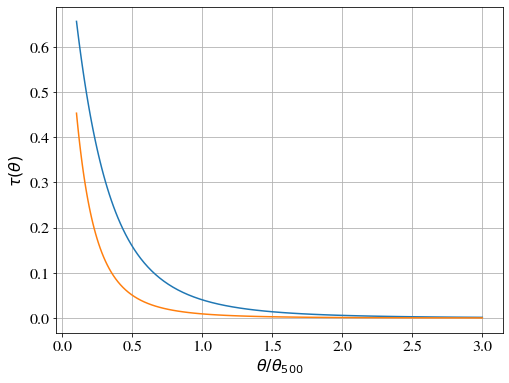

In [73]:
plt.plot(th_array,vec_tau_gnfw(th_array,z),label='gnfw')
plt.plot(th_array,vec_tau_battaglia(th_array,z),label='battaglia')
plt.xlabel(r'$\theta/\theta_{500}$')
plt.ylabel(r'$\tau(\theta)$')
plt.grid(which='both')
plt.legend(loc=1)

In [74]:
xd, yd = np.log(m_array), np.log(1.+th_array)
X, Y = np.meshgrid(xd, yd)
Z_gnfw = np.zeros(X.shape)
Z_battaglia = np.zeros(X.shape)
for ith in range(n_th):
    for im in range(n_m):
        mm = m_array[im]
        thth = th_array[ith]
        Z_gnfw[ith][im] = np.log(y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta(mm,thth,z))
        Z_battaglia[ith][im] = np.log(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(mm,thth,z))


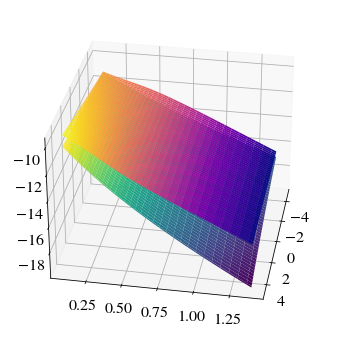

In [81]:
# Plot the 3D figure of the fitted function and the residuals.
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z_gnfw, cmap='plasma')
ax.plot_surface(X, Y, Z_battaglia, cmap='viridis')
#ax.set_zlim(np.min(Z),np.max(Z))

ax.view_init(30, 10)
plt.show()

In [84]:
from scipy.optimize import curve_fit

ln_tentoA0_gnfw = np.log(vec_y_gnfw(1.,0.,z))
def ym_rel_gnfw(vars_, a, b):
    xv,yv = vars_
    return a*xv + ln_tentoA0_gnfw + np.log(vec_tau_gnfw(np.exp(b*xv)*(np.exp(yv)-1.),z))

ln_tentoA0_battaglia = np.log(vec_y_battaglia(1.,0.,z))
def ym_rel_battaglia(vars_, a, b):
    xv,yv = vars_
    return a*xv + ln_tentoA0_battaglia + np.log(vec_tau_battaglia(np.exp(b*xv)*(np.exp(yv)-1.),z))





xdata = np.vstack((X.ravel(), Y.ravel()))
popt_gnfw, pcov_gnfw = curve_fit(ym_rel_gnfw, xdata, Z_gnfw.ravel(),p0 = [0.08,-0.025])
popt_battaglia, pcov_battaglia = curve_fit(ym_rel_battaglia, xdata, Z_battaglia.ravel(),p0 = [0.08,-0.025])

In [85]:
print(r'gnfw: 10^A_{0} = %.4e B=%.4e C=%.4e'%(np.exp(ln_tentoA0_gnfw),popt_gnfw[0],popt_gnfw[1]))
print(r'battaglia: 10^A_{0} = %.4e B=%.4e C=%.4e'%(np.exp(ln_tentoA0_battaglia),popt_battaglia[0],popt_battaglia[1]))


gnfw: 10^A_{0} = 4.9502e-05 B=1.9431e-01 C=6.4731e-02
battaglia: 10^A_{0} = 4.9028e-05 B=2.1964e-01 C=1.3577e-01


In [89]:
B_gnfw_bf = 1.9431e-01
C_gnfw_bf = 6.4731e-02

B_battaglia_bf = 2.1964e-01
C_battaglia_bf = 1.3577e-01

B_act = 0.08
C_act = -0.025

In [90]:
Z_fit_gnfw = np.zeros(X.shape)
Z_fit_battaglia = np.zeros(X.shape)
Z_fit_act = np.zeros(X.shape)
for ith in range(n_th):
    for im in range(n_m):
        mm = m_array[im]
        lnm = np.log(mm)
        thth = th_array[ith]
        ln_1pthth = np.log(1.+thth)
        Z_fit_gnfw[ith][im] = ym_rel_gnfw((lnm,ln_1pthth),B_gnfw_bf,C_gnfw_bf)
        Z_fit_battaglia[ith][im] = ym_rel_battaglia((lnm,ln_1pthth),B_battaglia_bf,C_battaglia_bf)
        Z_fit_act[ith][im] = ym_rel_gnfw((lnm,ln_1pthth),B_act,C_act)



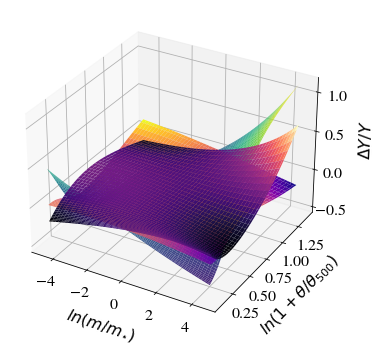

In [93]:
# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, (np.exp(Z_fit_gnfw)-np.exp(Z_gnfw))/np.exp(Z_gnfw), cmap='plasma')
ax.plot_surface(X, Y, (np.exp(Z_fit_battaglia)-np.exp(Z_battaglia))/np.exp(Z_battaglia), cmap='magma')
ax.plot_surface(X, Y, (np.exp(Z_fit_act)-np.exp(Z_gnfw))/np.exp(Z_gnfw), cmap='viridis')
plt.xlabel(r'$ln(m/m_{\star})$',labelpad=10)
plt.ylabel(r'$ln(1+\theta/\theta_{500})$',labelpad=10)
ax.set_zlabel(r'$\Delta Y/Y$',labelpad=10)
#ax.set_zlim(np.min(np.log(Z)),np.max(np.log(Z)))
plt.show()
#ax.legend()

Text(0.5, 1.0, 'class_sz gnfw')

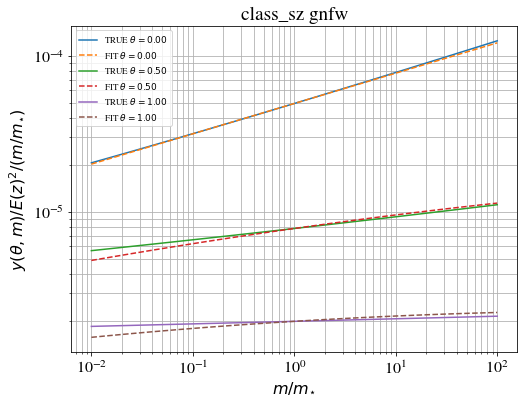

In [97]:
theta_test = 0.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_gnfw_bf, C_gnfw_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')

theta_test = 0.5
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_gnfw_bf, C_gnfw_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')


theta_test = 1.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_gnfw_bf, C_gnfw_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')




plt.loglog()
plt.grid(which='both')
plt.xlabel(r'$m/m_{\star}$')
plt.ylabel(r'$y(\theta,m)/E(z)^2/(m/m_{\star})$')
plt.legend(fontsize = 9.)
plt.title('class_sz gnfw')

Text(0.5, 1.0, 'class_sz battaglia')

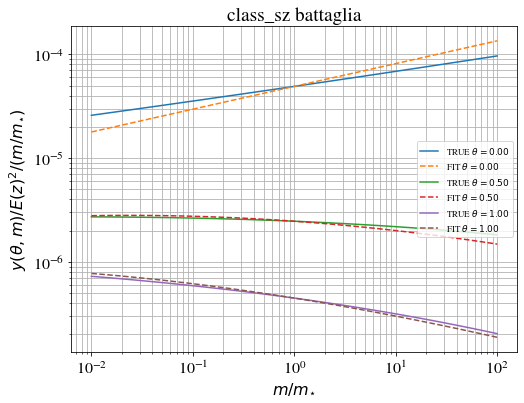

In [98]:
theta_test = 0.
plt.plot(m_array,vec_y_battaglia(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_battaglia((np.log(m_array),np.log(1.+theta_test)), B_battaglia_bf, C_battaglia_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')

theta_test = 0.5
plt.plot(m_array,vec_y_battaglia(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_battaglia((np.log(m_array),np.log(1.+theta_test)), B_battaglia_bf, C_battaglia_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')


theta_test = 1.
plt.plot(m_array,vec_y_battaglia(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_battaglia((np.log(m_array),np.log(1.+theta_test)), B_battaglia_bf, C_battaglia_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')




plt.loglog()
plt.grid(which='both')
plt.xlabel(r'$m/m_{\star}$')
plt.ylabel(r'$y(\theta,m)/E(z)^2/(m/m_{\star})$')
plt.legend(fontsize = 9.)
plt.title('class_sz battaglia')

Text(0.5, 1.0, 'act gnfw')

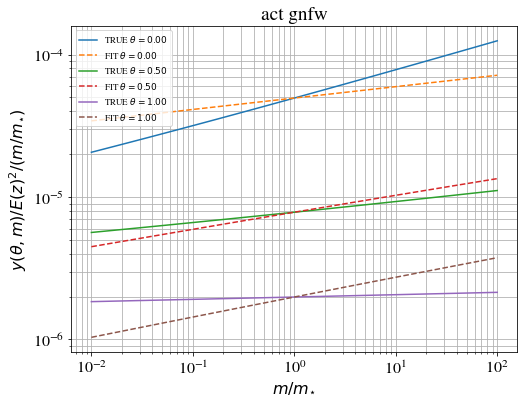

In [99]:
theta_test = 0.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_act, C_act)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')

theta_test = 0.5
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_act, C_act)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')


theta_test = 1.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_act, C_act)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')




plt.loglog()
plt.grid(which='both')
plt.xlabel(r'$m/m_{\star}$')
plt.ylabel(r'$y(\theta,m)/E(z)^2/(m/m_{\star})$')
plt.legend(fontsize = 9.)
plt.title('act gnfw')

In [17]:
M.struct_cleanup()
M.empty()

# y-m relation

In [10]:
M = Class()
cosmo_settings = {
                  'omega_cdm': 0.125,
                  'omega_b': 0.0224,
                  'A_s': 1.9e-9,
                  'n_s': 0.96,
                  'H0': 69.,
                  'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
                  'YHe': 'BBN',

                  # 1 massive neutrino (planck 2018 baseline)
                  'N_ur': 2.0328,
                  'N_ncdm': 1,
                  'm_ncdm': 0.06,
                  'T_ncdm': 0.71611,


                  # X ray mass bias (if applicable)
                  'B' : 1.,
    
                  'output' : 'sz_cluster_counts'
}

M.set(cosmo_settings)
M.set({
          'y_m_relation' : 1, # simons observatory/ACT
          # scaling law parameter
          # Hilton et al 2020
          'A_ym' : 4.95e-5,
          'B_ym' : 0.08,
})
M.compute()

z = 1.e0
m = np.geomspace(5e13,5e15,50)
y_hilton = []
for mm in m:
    y_hilton.append(M.get_y_at_m_and_z(mm,z))
    
M.set({
    'y_m_relation' : 0, # planck 
     # scaling law parameter
     # Planck 2015    ?
    'ystar_ym': -0.186,
    'alpha_ym': 1.78,
    'beta_ym': 0.66,
    
})
M.compute()
y_planck = []
for mm in m:
    y_planck.append(M.get_y_at_m_and_z(mm,z))
#y_hilton

[]

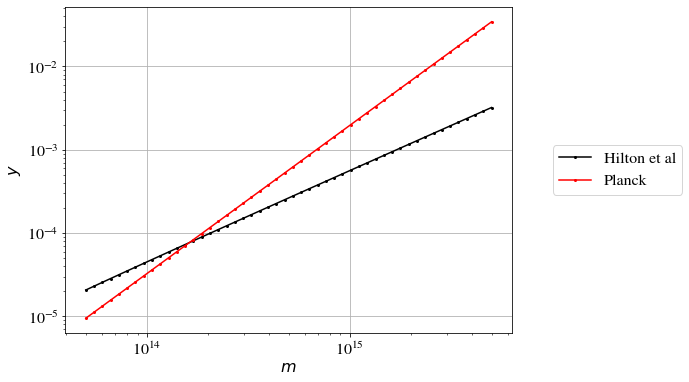

In [11]:
plt.xlabel(r"$m$")
plt.ylabel(r"$y$")
plt.grid()
plt.plot(m,y_hilton,marker  = 'o',markersize = 2.,c='k',label='Hilton et al')
plt.plot(m,y_planck,marker  = 'o',markersize = 2.,c='r',label='Planck')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

In [12]:
M.struct_cleanup()
M.empty()

# Computing cluster abundance (SO)

In [44]:
M = Class()
cluster_settings = {
                   # LambdaCDM parameters
#                    'h':0.7,
#                    'B': 1.,
#                    'Omega_b':0.04,
#                    'Omega_cdm':0.26,
#                    'A_s':1.75e-9,
#                    'n_s': 0.96
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   'n_s': 0.96605
}

best_fit ={
   'H0': 6.7169970E+01,
   'A_s': 1.8160055E-09,
   'omega_cdm': 1.1972036E-01,
   'B_ym': -8.7525562E-02,
   'A_ym': 4.9660989E-05,
   'omega_b': 0.022383,
   'tau_reio': 0.0543,
   'n_s': 0.96605
}

mass_cal ={
#    'H0': 6.7169970E+01,
#    'A_s': 1.8160055E-09,
#    'omega_cdm': 1.1972036E-01,
   'B_ym': 0.1,
   'A_ym': 2.85e-5,
#    'omega_b': 0.022383,
#    'tau_reio': 0.0543,
#    'n_s': 0.96605
#     'B': 1.4
}

M.set(p18_cosmo)
M.set(mass_cal)
# M.set(best_fit)
M.set({
          'non linear': 'halofit',
          'output' : 'sz_cluster_counts',
          'mass function' : 'M500',
          'integrate_wrt_m500c' : 1,
          'has_selection_function' : 1,
          'experiment' : 1, # simons observatory
          'y_m_relation' : 1,
          'signal-to-noise cut-off for survey cluster completeness' : 5.,

          # scaling law parameter
          #'A_ym' : 4.90e-5,
          #'B_ym' : 0.22,
          'C_ym' : 0.,



          'M1SZ' : 5e13,
          'M2SZ' : 5e15,

          # bin_z_min_cluster_counts : 0.
          # bin_z_max_cluster_counts : 2.
          # bin_dz_cluster_counts : 0.1
          #
          #
          #'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
          'YHe': 'BBN',

          # 1 massive neutrino (planck 2018 baseline)
          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.06,
          'T_ncdm': 0.71611,

          #
          # #3 massive neutrinos
          # N_ur : 0.00641
          # N_ncdm : 1
          # deg_ncdm : 3
          # m_ncdm : 0.02
          # T_ncdm : 0.71611



          #
          # HMF_prescription_NCDM: 'CDM'

          # verbose parameters for debugging
          'input_verbose' : 0,
          'background_verbose': 3,
          'perturbations_verbose': 0,
          'sz_verbose'  : 3,

          # X ray mass bias (if applicable)
          'B' : 1.4,


          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 2.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.1,

          'dlny' : 0.03,
          'lnymin' : -11.,
          'lnymax' : -5.,
          'sigmaM_ym' : 0.2,
          'dlnM_cluster_count_completeness_grid' : 0.02,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,

          'dz_cluster_count_completeness_grid_low_z' : 5e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-1,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,

          'mass_epsrel_cluster_counts' : 1e-3,
          'mass_epsabs_cluster_counts' : 1e-30,

          'redshift_epsrel_cluster_counts' : 1e-3,
          'redshift_epsabs_cluster_counts' : 1e-30,
          #
          #
          # # tabulation of mass function:
          'n_z_dndlnM' : 80,
          'n_m_dndlnM' : 80,
          #
          # # computation of mass function
          # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 80,
          'ndim_redshifts' : 80,
          #
          # pk setup for computation of sigma and dsigma
          'k_per_decade_class_sz' : 20.,
          'k_min_for_pk_class_sz' : 1e-3,
          'k_max_for_pk_class_sz' : 1e1,

          'P_k_max_h/Mpc' : 1e1
    
})
M.compute()

In [47]:
mm = 5e13
z = 5.5
M.get_y_at_m_and_z(mm,z)


0.0002225145789344047

In [48]:
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())

sigma8 : 0.811665
Omega_m : 0.315838


In [49]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']
M.struct_cleanup()
M.empty()

In [50]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))



In [51]:
# here puth the path to the directory : MFMF_SOSim_3freq_tiles
path_to_catalogue = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/MFMF_SOSim_3freq_tiles/'
from astropy.io import fits
#"fits_image_filename = fits.util.get_testdata_filepath(path_to_catalogue+'MFMF_SOSim_3freq_tiles_M500.fits')
tcat = path_to_catalogue+'MFMF_SOSim_3freq_tiles_M500.fits'
list = fits.open(tcat)
data = list[1].data
z = data.field("redshift")
snr = data.field("SNR")
tile = data.field("tileName")
snrcut = 5
z = z[snr > snrcut]
snr = snr[snr > snrcut]
sf = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_020621_skyfracs.txt')
print('sky fraction:',sf.sum())

sky fraction: 0.43213469173544644


In [52]:
import pandas as pd

# df  = {"M200m"}

In [53]:
df = {"M200m":data.field("M200m").byteswap().newbyteorder(),
     "M500c":data.field("M500").byteswap().newbyteorder(),
     "redshift":data.field("redshift").byteswap().newbyteorder(),
     "y_c": data.field("fixed_y_c").byteswap().newbyteorder()}
df = pd.DataFrame(df)

In [59]:
df["redshift"][30136]

0.6090747062823515

In [60]:
def E(zp):
    return M.Hubble(zp)/M.Hubble(0.)
vec_Ez = np.vectorize(E)
df["y_c_over_Ez2"] = df["y_c"]/vec_Ez(df["redshift"])**2.
df

,M200m,M500c,redshift,y_c,y_c_over_Ez2
0,5.482577,3.174886,1.230438,0.685775,0.163645
1,4.851615,2.652659,0.311749,0.430087,0.307820
2,2.726391,1.612437,0.831074,0.247447,0.094302
3,4.751891,2.781727,0.985001,0.510689,0.161836
4,2.738110,1.545051,1.772472,0.344519,0.046434
...,...,...,...,...,...
30132,4.064517,2.387425,0.971221,0.417228,0.134395
30133,5.845295,3.356987,0.609932,0.578439,0.288854
30134,4.634598,2.464252,0.218872,0.421021,0.335159
30135,6.886024,3.740221,0.318073,0.671116,0.476793


[]

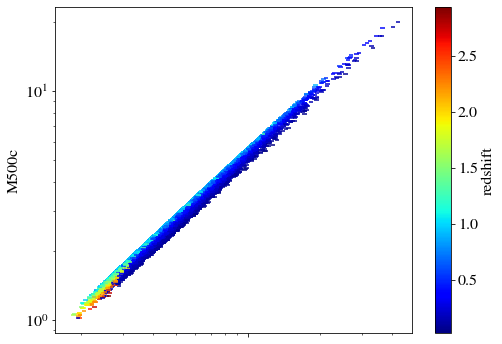

In [16]:

# m500cs = data.field("M500")
# m200ms = data.field("M200m")
# y_c = data.field("y_c")
df.plot.scatter("M200m","M500c",c="redshift", cmap='jet',marker=1)
plt.loglog()
# plt.legend()

<Figure size 576x432 with 0 Axes>

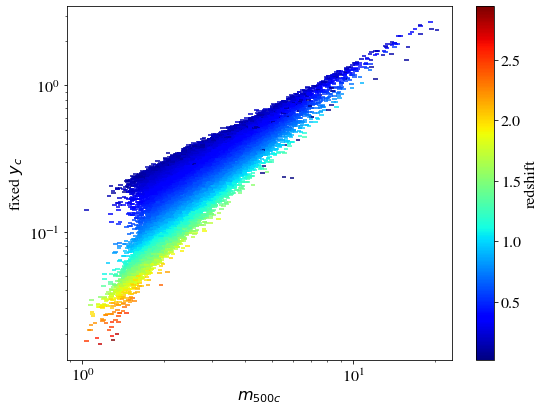

In [18]:
plt.figure()
ax = df.plot(kind="scatter",x="M500c",y="y_c_over_Ez2",c="redshift", cmap='jet',marker=1, sharex=False)
plt.loglog()
ax.set_ylabel(r"fixed $y_c$")
ax.set_xlabel(r"$m_{500c}$")
plt.tight_layout()
# plt.show()
# plt.grid()

In [11]:
data.columns

ColDefs(
    name = 'name'; format = '18A'
    name = 'RADeg'; format = 'D'
    name = 'decDeg'; format = 'D'
    name = 'SNR'; format = 'D'
    name = 'numSigPix'; format = 'D'
    name = 'template'; format = '17A'
    name = 'tileName'; format = '7A'
    name = 'galacticLatDeg'; format = 'D'
    name = 'fixed_SNR'; format = 'D'
    name = 'deltaT_c'; format = 'D'
    name = 'err_deltaT_c'; format = 'D'
    name = 'y_c'; format = 'D'
    name = 'err_y_c'; format = 'D'
    name = 'fixed_deltaT_c'; format = 'D'
    name = 'fixed_err_deltaT_c'; format = 'D'
    name = 'fixed_y_c'; format = 'D'
    name = 'fixed_err_y_c'; format = 'D'
    name = 'redshift'; format = 'D'
    name = 'redshiftErr'; format = 'D'
    name = 'M500'; format = 'D'
    name = 'M500_errPlus'; format = 'D'
    name = 'M500_errMinus'; format = 'D'
    name = 'M500Uncorr'; format = 'D'
    name = 'M500Uncorr_errPlus'; format = 'D'
    name = 'M500Uncorr_errMinus'; format = 'D'
    name = 'M200m'; format = 'D'
    name

Text(0.5, 0, 'cl id')

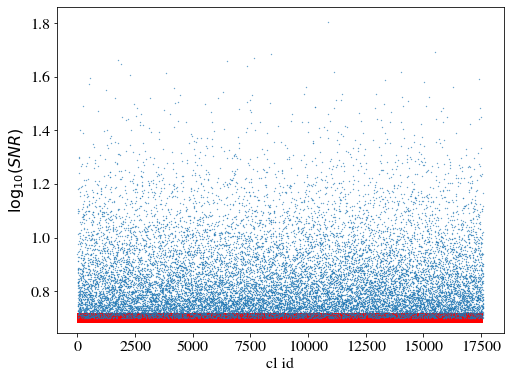

In [61]:
plt.plot(np.log10(snr),marker='o',ls='None',markersize=0.3)
plt.hlines(np.log10(snrcut),xmin=0,xmax=len(snr),color='r',lw=10)
plt.ylabel(r'$\log_{10}(SNR)$')
plt.xlabel('cl id')

Text(0, 0.5, '$z$')

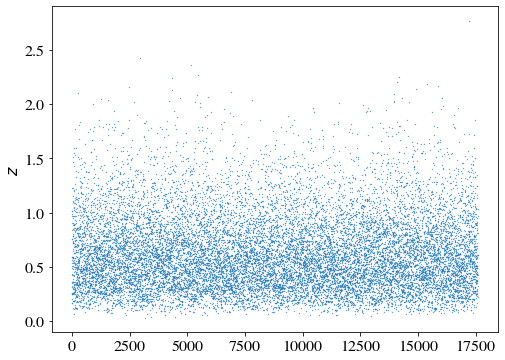

In [62]:
plt.plot(z,marker='o',ls='None',markersize=0.3)
plt.ylabel(r'$z$')
# plt.hlines(np.log10(snrcut),xmin=0,xmax=len(snr),color='r',lw=10)

(1.0, 5000.0)

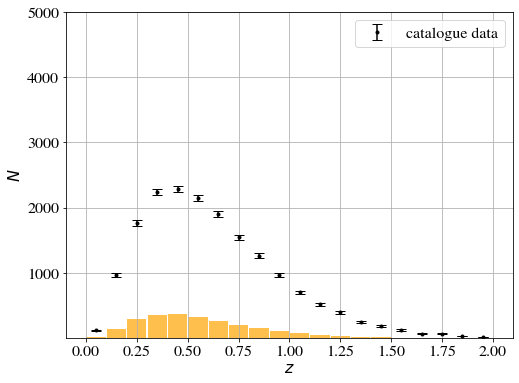

In [63]:
N_clusters_z, xedges = np.histogram(z, bins=z_edges)
plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.hist(z_center,N_clusters_z_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95)
plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
plt.ylim(1e0,5e3)

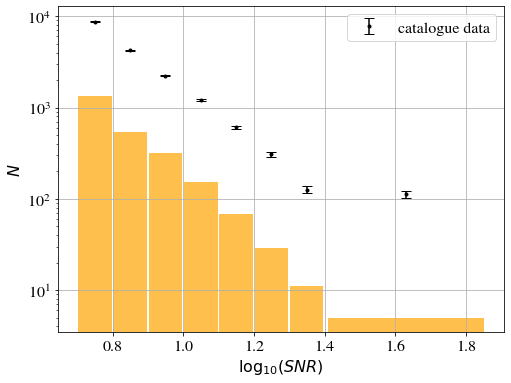

In [64]:
N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.plot(log10y_center,N_clusters_y_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95)


plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')

In [65]:
dNdzdy_catalog, zedges, yedges = np.histogram2d(z,np.log10(snr), bins=[z_edges,log10y_edges])
SZCC_Cash = 0.
for index_z in range(N_z):
    for index_y in range(N_y):
        if not dNdzdy_theoretical[index_z][index_y] == 0.:
            ln_factorial = 0.
            if not dNdzdy_catalog[index_z,index_y] == 0.:
                if dNdzdy_catalog[index_z,index_y] > 10.:
                    # Stirling approximation only for more than 10 elements
                    ln_factorial = 0.918939 + (dNdzdy_catalog[index_z,index_y] + 0.5) * np.log(dNdzdy_catalog[index_z,index_y]) - dNdzdy_catalog[index_z,index_y]
                else:
                    # Direct computation of factorial
                    ln_factorial = np.log(np.math.factorial(int(dNdzdy_catalog[index_z,index_y])))
            SZCC_Cash += (dNdzdy_catalog[index_z,index_y] * np.log(dNdzdy_theoretical[index_z][index_y]) - dNdzdy_theoretical[index_z][index_y] - ln_factorial)

# return ln(L)
loglkl = SZCC_Cash
print(loglkl)

-20394.11943865362


In [66]:
np.sum(dNdzdy_theoretical)

2451.4569798812954

In [67]:
np.sum(dNdzdy_theoretical)

2451.4569798812954

In [ ]:
    // pcsz->lnM_max = 37.; //cosmomc/szount.f90 range
    // pcsz->lnM_min = 31.54;

In [16]:
np.exp(37.)

1.1719142372802612e+16

# Computing cluster abundance

In [17]:
M = Class()


best_fit_planck_new_sigmaM ={
   'H0': 6.8078121E+01,
   'A_s': 1.6473666E-09,
   'omega_cdm': 1.2547102E-01,
   'omega_b': 2.1865653E-02,
   'tau_reio': 0.0543,
   'n_s': 9.5611087E-01,
    
    'alpha_ym': 1.8674885E+00,
    'ystar_ym': -1.8663318E-01,
    'sigmaM_ym': 1.6903344E-01,
    'B': 1./(7.7068241E-01)
}

best_fit_planck_old_sigmaM ={
   'H0': 6.7318259E+01,
   'A_s': 1.8548184E-09,
   'omega_cdm': 1.1707694E-01,
   'omega_b': 2.1572441E-02,
   'tau_reio': 0.0543,
   'n_s': 9.6892923E-01,
    
    'alpha_ym': 1.8226235E+00,
    'ystar_ym': -1.9139607E-01,
    'sigmaM_ym': 7.0815376E-02,
    'B': 1./(7.6169989E-01)
}

M.set(best_fit_planck_old_sigmaM)

M.set({
          'M2SZ':np.exp(37.),
          'M1SZ':np.exp(31.54),
          'non linear': 'halofit',
          'output' : 'sz_cluster_counts',
          'mass function' : 'M500',
          'integrate_wrt_m500c' : 1,
          'has_selection_function' : 1,
          'experiment' : 0,
          'y_m_relation' : 0,
          'signal-to-noise cut-off for survey cluster completeness' : 6.,

          #'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
          'YHe': 'BBN',

          # 1 massive neutrino (planck 2018 baseline)
          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.06,
          'T_ncdm': 0.71611,



          # verbose parameters for debugging
          'input_verbose' : 0,
          'background_verbose': 3,
          'perturbations_verbose': 0,
          'sz_verbose'  : 3,



          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 1.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.25,

          'dlny' : 0.05,
          'lnymin' : -11.5,
          'lnymax' : 10.,
          #'sigmaM_ym' : 0.2,
          'dlnM_cluster_count_completeness_grid' : 0.05,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.2,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

          'dz_cluster_count_completeness_grid_low_z' : 1e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,

          'mass_epsrel_cluster_counts' : 1e-5,
          'mass_epsabs_cluster_counts' : 1e-30,

          'redshift_epsrel_cluster_counts' : 1e-5,
          'redshift_epsabs_cluster_counts' : 1e-30,

          # # tabulation of mass function:
          'n_z_dndlnM' : 100,
          'n_m_dndlnM' : 100,
          #
          # # computation of mass function
          # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 100,
          'ndim_redshifts' : 100,
          #
          # pk setup for computation of sigma and dsigma
          'k_per_decade_class_sz' : 20.,
          'k_min_for_pk_class_sz' : 1e-3,
          'k_max_for_pk_class_sz' : 5e1,

          'P_k_max_h/Mpc' : 7e1
    
})
M.compute()

In [18]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']
M.struct_cleanup()
M.empty()



In [19]:
np.sum(dNdzdy_theoretical)

365.9009211722964

In [14]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))




No handles with labels found to put in legend.


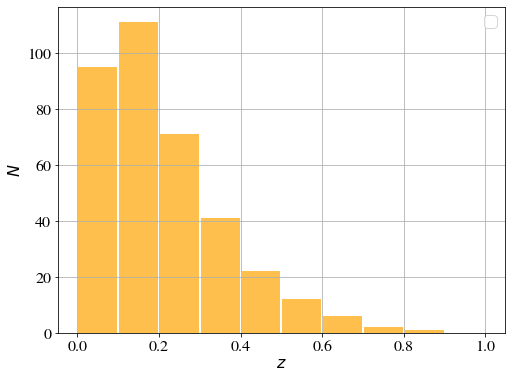

In [15]:
#N_clusters_z, xedges = np.histogram(z, bins=z_edges)
# plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.hist(z_center,N_clusters_z_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95)
plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
# plt.ylim(1e0,5e3)

No handles with labels found to put in legend.


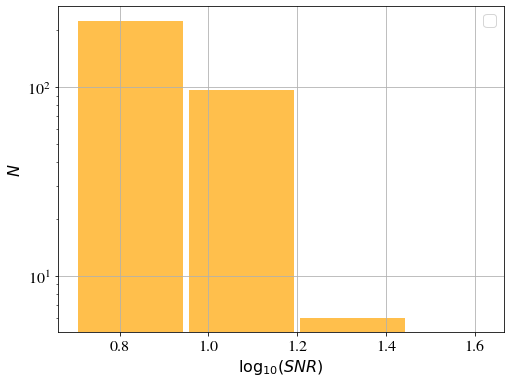

In [10]:
#N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
# plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.plot(log10y_center,N_clusters_y_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95)


plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')